<a href="https://colab.research.google.com/github/meghalshah9531/Deep_Learning_Udacity/blob/master/FFNN_MNIST_Number_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch import nn, optim 
import torchvision 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 

In [ ]:
# Checking Device Availablity 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Hyper Parameters 

# Input size consists of 28 x 28 image pixels 
input_size = 784 

# No. of Nurons in Hidden Layer 
hidden_size = 400 

# Total no. of classes (Output class)
num_classes = 10 

# No. of Epochs 
num_epochs = 5 

# Batch size 
batch_size = 100

# Learning Rate 
learning_rate = 0.005

In [ ]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)

In [ ]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


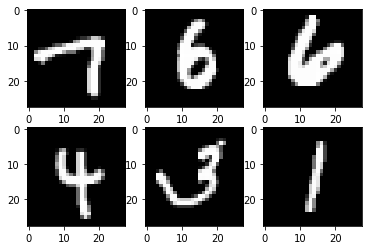

In [ ]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [ ]:
# Fully-connected Neural Network with one Hidden layer 
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out 
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# training loop 
n_total = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 64, 1, 28, 28 
    # 64, 784 
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total}, loss={loss.item():.4f}')


epoch 1 / 5, step 100/600, loss=0.1241
epoch 1 / 5, step 200/600, loss=0.1179
epoch 1 / 5, step 300/600, loss=0.2054
epoch 1 / 5, step 400/600, loss=0.1974
epoch 1 / 5, step 500/600, loss=0.2240
epoch 1 / 5, step 600/600, loss=0.1949
epoch 2 / 5, step 100/600, loss=0.0406
epoch 2 / 5, step 200/600, loss=0.1153
epoch 2 / 5, step 300/600, loss=0.0895
epoch 2 / 5, step 400/600, loss=0.0840
epoch 2 / 5, step 500/600, loss=0.1575
epoch 2 / 5, step 600/600, loss=0.2753
epoch 3 / 5, step 100/600, loss=0.0368
epoch 3 / 5, step 200/600, loss=0.0183
epoch 3 / 5, step 300/600, loss=0.0087
epoch 3 / 5, step 400/600, loss=0.1051
epoch 3 / 5, step 500/600, loss=0.0321
epoch 3 / 5, step 600/600, loss=0.0523
epoch 4 / 5, step 100/600, loss=0.0552
epoch 4 / 5, step 200/600, loss=0.0190
epoch 4 / 5, step 300/600, loss=0.0351
epoch 4 / 5, step 400/600, loss=0.0690
epoch 4 / 5, step 500/600, loss=0.0742
epoch 4 / 5, step 600/600, loss=0.0230
epoch 5 / 5, step 100/600, loss=0.0189
epoch 5 / 5, step 200/600

In [ ]:
# Testing 
with torch.no_grad():
  n_correct = 0 
  n_samples = 0 
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  acc = 100.0 * n_correct/n_samples
  print(f'accuracy = {acc}')

accuracy = 97.77
